<a href="https://colab.research.google.com/github/Bonniface/NNO/blob/main/notebooks/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Optimizatio

---

## Overview

This project aims to enhance neural network efficiency for resource-constrained devices through the combined application of pruning, quantization, and weight sharing, integrated with Dispersive Flies Optimization (DFO). The goal is to reduce the model's size and computational requirements while maintaining high accuracy, making it suitable for deployment on devices such as IoT devices, microcontrollers, and smartphones.

## Table of Contents

- [Overview](#overview)
- [Prerequisites](#prerequisites)
- [Installation](#installation)
- [Usage](#usage)
  - [Initial Training](#initial-training)
  - [Pruning](#pruning)
  - [Quantization](#quantization)
  - [Weight Sharing](#weight-sharing)
  - [Evaluation](#evaluation)
- [Contributing](#contributing)
- [License](#license)
- [Contact](#contact)

## Prerequisites

Before we begin, ensure we have met the following requirements:

- Python 3.6 or higher
- PyTorch
- Scikit-learn
- NumPy


In [7]:
## Installation
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np

from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [8]:
# Check for available devices and set the appropriate one
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    device_name = 'GPU'
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
else:
    device_name = 'CPU'

print(f"Using device: {device_name}")

Using device: CPU


In [9]:
# Set a random seed for reproducibility
np.random.seed(42)

In [10]:
# Load and preprocess data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


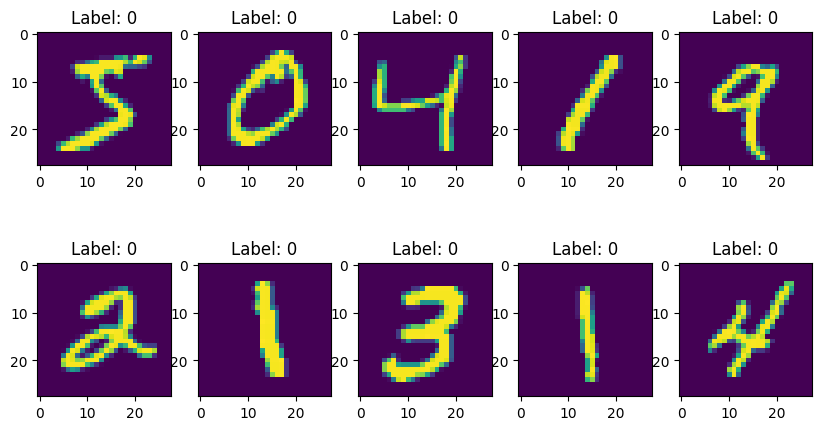

In [11]:
import matplotlib.pyplot as plt
# Display some of the figures
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(X_train[i].reshape(28, 28))
    axes[i].set_title(f'Label: {np.argmax(y_train[i])}')
    axes[i].axis('on')

plt.subplots_adjust(hspace=0.5)
plt.show()


In [12]:
# Create the LeNet model
model = Sequential()

# Layer 1: Convolutional + Average Pooling
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(AveragePooling2D())

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))# Layer 2: Convolutional + Average Pooling
model.add(AveragePooling2D())

model.add(Flatten())# Flatten the data for the fully connected layers
model.add(Dense(120, activation='relu'))# Layer 3: Fully Connected
model.add(Dense(84, activation='relu'))# Layer 4: Fully Connected
model.add(Dense(10, activation='softmax'))# Output Layer: Fully Connected with softmax activation
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [13]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,to_categorical(y_train),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1993 - accuracy: 0.9459
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0632 - accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0490 - accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0396 - accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0308 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0271 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0244 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0234 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 32s 17m

313/313 [==============================] - 2s 6ms/step


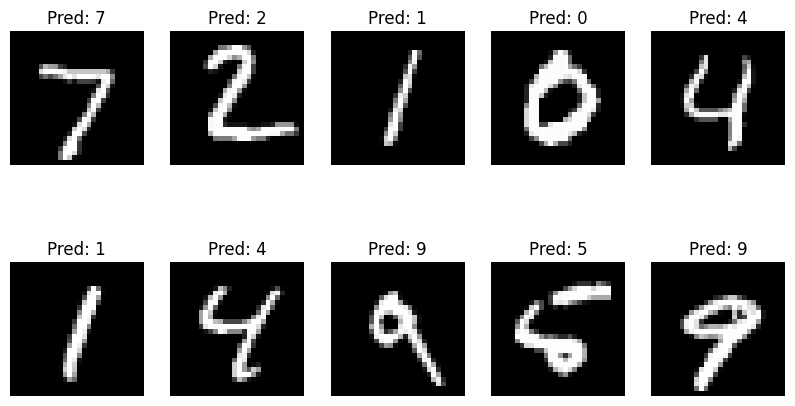

In [55]:
predictions = model.predict(X_test)
# Display some of the predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Pred: {np.argmax(predictions[i])}')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [36]:
# Prune the model
def prune_low_magnitude(model, pruning_ratio, threshold, sparsity_target):
    # Implement the pruning function here
    pruned_model = model
    return pruned_model

pruned_model = prune_low_magnitude(model, 0.5, 0.5, 0.8)

# Quantize the pruned model
def quantize_model(model):
    # Implement the quantization function here
    quantized_model = model
    return quantized_model

quantized_model = quantize_model(pruned_model)

# Evaluate both prune and quantize on the model
def evaluate_pruned_quantized_model(pruning_ratio, quantization_precision):
    # Prune the model based on the pruning ratio
    pruned_model = prune_low_magnitude(model, pruning_ratio, 0.5, 0.8)

    # Quantize the pruned model based on the quantization precision
    quantized_model = quantize_model(pruned_model)

    # Evaluate the performance of the pruned and quantized model
    loss, accuracy = quantized_model.evaluate(X_test, to_categorical(y_test))
    return accuracy

# DFO

In [53]:
# Initialize parapeter for DFo
num_flies = 10 # Population size
maxIterations = 10  # Iterations allowed
max_function_evaluations = 30
pruning_ratio_bounds = [0.1, 0.9]  # Example bounds for pruning ratio
quantization_precision_bounds = [4, 8]  # Example bounds for quantization precision
delta = 0.1  # Disturbance threshold

# Initialize flies' positions randomly within the search space
flies = np.random.uniform([pruning_ratio_bounds[0], quantization_precision_bounds[0]],
                          [pruning_ratio_bounds[1], quantization_precision_bounds[1]],
                          (num_flies, 2))

# Initialize best positions and accuracies for each fly
fitness = np.zeros(num_flies)
best_positions = flies.copy()
best_accuracies = np.zeros(num_flies)
global_best_position = flies[0]
global_best_accuracy = 0


In [51]:
# Evaluate initial positions
function_evaluations = 0
for i in range(num_flies):
    accuracy = evaluate_pruned_quantized_model(flies[i][0], flies[i][1])
    best_accuracies[i] = accuracy
    if accuracy > global_best_accuracy:
        global_best_accuracy = accuracy
        global_best_position = flies[i]
    function_evaluations += 1

313/313 [==============================] - 2s 6ms/step - loss: 0.0736 - accuracy: 0.9887


In [52]:


# Store accuracies for plotting
global_best_accuracies = []

# Main optimization loop
while function_evaluations < max_function_evaluations:
  for iteration in range(maxIterations):
    for i in range(num_flies):
        # Dispersal: Randomly move some flies
        if np.random.rand() < 0.1:  # Dispersal probability
            flies[i] = np.random.uniform([pruning_ratio_bounds[0], quantization_precision_bounds[0]],
                                         [pruning_ratio_bounds[1], quantization_precision_bounds[1]])
        # Attraction: Move flies towards the best-known positions
        else:
            flies[i] += 0.1 * (global_best_position - flies[i])  # Attraction to global best

        # Ensure flies stay within bounds
        flies[i] = np.clip(flies[i], [pruning_ratio_bounds[0], quantization_precision_bounds[0]],
                           [pruning_ratio_bounds[1], quantization_precision_bounds[1]])

        # Evaluate new position
        accuracy = evaluate_pruned_quantized_model(flies[i][0], flies[i][1])
        function_evaluations += 1
        if accuracy > best_accuracies[i]:
            best_accuracies[i] = accuracy
            best_positions[i] = flies[i]
        if accuracy > global_best_accuracy:
            global_best_accuracy = accuracy
            global_best_position = flies[i]

    global_best_accuracies.append(global_best_accuracy)

print(f"Best pruning ratio: {global_best_position[0]}")
print(f"Best quantization precision: {global_best_position[1]}")
print(f"Best accuracy: {global_best_accuracy}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0736 - accuracy: 0.9887
Best pruning ratio: 0.6204631627411608
Best quantization precision: 29.04807164655444
Best accuracy: 0.9886999726295471


313/313 [==============================] - 2s 5ms/step - loss: 0.0736 - accuracy: 0.9887
Iteration: 0	Best fly index: 0	Fitness value: 0.9886999726295471
313/313 [==============================] - 2s 7ms/step - loss: 0.0736 - accuracy: 0.9887

Final best fitness:	 0.9886999726295471

Best fly position:
 [0.74920953 6.05954272]


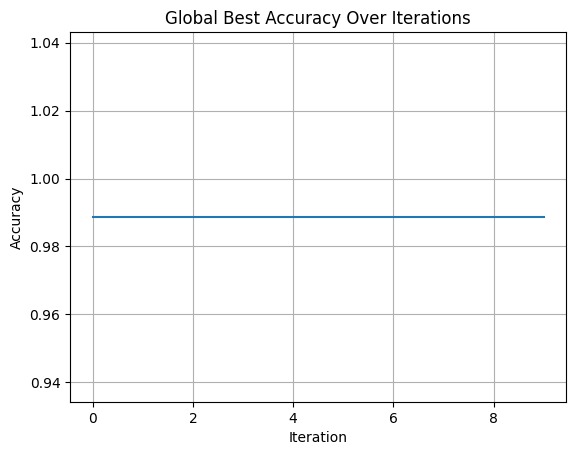

In [54]:
# FITNESS FUNCTION (SPHERE FUNCTION)
def fitness_score(x): # x IS A VECTOR REPRESENTING ONE FLY
	sum = 0.0
	for i in range(len(x)):
		sum = sum + np.power(x[i],2)
	return sum
# Track global best accuracies for plotting
global_best_accuracies = []



# Main optimization loop
for itr in range(maxIterations):
    for i in range(num_flies):
        fitness[i] = evaluate_pruned_quantized_model(flies[i][0], flies[i][1])
    s = np.argmax(fitness)  # Find best fly

    if itr % 100 == 0:  # Print best fly every 100 iterations
        print(f"Iteration: {itr}\tBest fly index: {s}\tFitness value: {fitness[s]}")

    # Track the best accuracy for plotting
    global_best_accuracies.append(fitness[s])

    # Take each fly individually
    for i in range(num_flies):
        if i == s: continue  # Elitist strategy

        # Find best neighbor
        left = (i - 1) % num_flies
        right = (i + 1) % num_flies
        bNeighbour = right if fitness[right] > fitness[left] else left

        for d in range(2):  # Update each dimension separately
            if np.random.rand() < delta:
                flies[i, d] = np.random.uniform(pruning_ratio_bounds[d], quantization_precision_bounds[d])
                continue

            u = np.random.rand()
            flies[i, d] = flies[bNeighbour, d] + u * (flies[s, d] - flies[i, d])

            # Out of bound control
            if flies[i, d] < pruning_ratio_bounds[d] or flies[i, d] > quantization_precision_bounds[d]:
                flies[i, d] = np.random.uniform(pruning_ratio_bounds[d], quantization_precision_bounds[d])

for i in range(num_flies):
    fitness[i] = evaluate_pruned_quantized_model(flies[i][0], flies[i][1])  # Final evaluation
s = np.argmax(fitness)  # Find best fly

print("\nFinal best fitness:\t", fitness[s])
print("\nBest fly position:\n", flies[s,])